<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Visión por Computadora</center></span>
## <span style="color:red"><center>Procesamiento básico de imágenes</center></span>

##   <span style="color:blue">Profesores</span>

### Coordinador


- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

### Conferencistas


- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 



Vamos a ver algunas de las transformaciones más comunes a la hora de trabajar con imágenes. Esto tiene ventajas a la hora del pre procesamiento, cambiando los datos para darles más variedad y mejorar las capacidades de los modelos que construyamos

## <span style="color:blue">Transformaciones geométricas</span>

Vamos a tomar esto como el cambiar las propiedades "físicas" de la imagen. Dícese las dimensiones, la posición y su orientación. 

Como definimos anteriormente, las imágenes pueden representarse como matrices numéricas, asi que podemos multiplicar estas con otras matrices para obtener las versiones "transformadas" de las imágenes originales. Depende a la matriz que utilicemos obtendremos una transformación distinta.

### <span style="color:blue">Traslación</span>

Mover una imagen a través de una linea. Esta por supuesto puede definirse en un plano bidimensional. podemos decir que movemos la imagen "a" pasos en el eje $x$, y "b" pasos en el eje $y$

<figure>
<center>
<img src="../Imagenes/traslacion.png" width="400" height="400" align="center"/> 
</center>
</figure>

Podemos apreciar esto de forma matricial siguiendo esta fórmula

\begin{align}
    \begin{bmatrix}
        x'\\
        y'\\
    \end{bmatrix} =    
    \begin{bmatrix}
        x+a\\
        y+b\\
    \end{bmatrix}=
    \begin{bmatrix}
        x\\
        y\\
    \end{bmatrix}+
    \begin{bmatrix}
        a\\
        b\\
    \end{bmatrix}
\end{align}

¿Cómo definimos esto a nivel matricial?

Hay que definir una matriz con los valores a y b, para luego multiplicarlo a la imagen original. 

En numpy lo podemos definir de la siguiente manera


In [4]:
import numpy as np

points = np.array([
    [3, 7, -2],
    [-1, -5, -2],
    [1, 1, 1]
])

hagamos la transformación "manualmente"

In [6]:
outPoints = np.array([
    [3-4, 7-4, -2-4],
    [-1+5, -5+5, -2+5],
    [1, 1, 1]
])

print(outPoints)

[[-1  3 -6]
 [ 4  0  3]
 [ 1  1  1]]


Esto se toma mucho tiempo. Definamos una matriz de transformación

In [7]:
x = -4 #cuánto movemos sobre x

y = 5 #cuánto movemos sobre y

M = np.array([
    [1, 0, x],
    [0, 1, y],
    [0, 0, 1]
])

print(M@points)

[[-1  3 -6]
 [ 4  0  3]
 [ 1  1  1]]


### <span style="color:blue">Rotación</span>

Girar una imagen alrededor de un punto en un ángulo especificado

<figure>
<center>
<img src="../Imagenes/rotacion.png" width="400" height="400" align="center"/> 
</center>
</figure>

En el caso más sencillo, se define el punto de rotación como el centro de la imagen. transformación se define como:

\begin{align}
    \begin{bmatrix}
        x'\\
        y'\\
    \end{bmatrix}=
    \begin{bmatrix}
        cos \theta & -sin \theta\\
        sin \theta & cos \theta\\
    \end{bmatrix}
    \begin{bmatrix}
        x\\
        y\\
    \end{bmatrix}
\end{align}

Pero OpenCV de hecho utiliza una transformación más poderosa que permite elegir cualquier punto como centro de rotación, además de permitir escalar la imagen

\begin{align}
    \begin{bmatrix}
        \alpha & \beta & (1 - \alpha) * c_x - \beta * c_y\\
        -\beta & \alpha & \beta * c_x + (1 - \alpha) * c_y\\
    \end{bmatrix}
\end{align}

donde $\alpha = \text{escala} * cos \theta$, $\beta = \text{escala} * sin \theta$ y $(c_x, c_y)$ es el punto de rotación

OpenCV tiene la función `getRotationMatrix2D` de tal forma que no hay que definir la matriz manualmente

## <span style="color:blue">Transformación afín</span>

las dos transformaciones (junto con muchas otras) las podemos aplicar en OpenCV como "transformaciones afínes". Siendo estas todas las transformaciones que conserven colinealidad(los puntos se mantienen en lineas relativas) y ratas de distancia(Los puntos intermedios se mantienen intermedios). 

Las funciones que vimos, siendo estas transformaciones afínes, se pueden aplicar en el contexto de imagenes a través de la función `warpAffine`. Es necesario darle a esta función la imagen a transformar, la matriz de transformación y el tamaño que queremos que tenga.

Veámoslo todo en un ejemplo

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

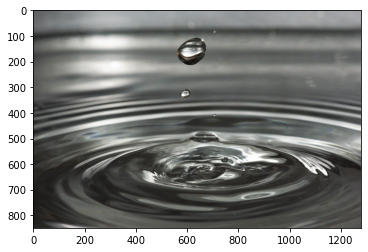

In [2]:
img = cv2.imread('../Imagenes/drip.jpg')

plt.imshow(img[:,:,::-1])
plt.show()

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

height, width = img.shape

Hagamos una traslación

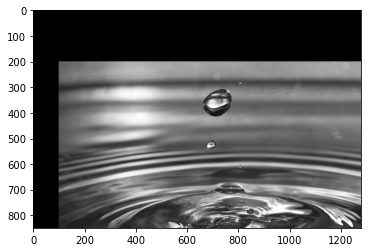

In [4]:
tx = 100
ty = 200

M = np.float32([
    [1, 0, tx],
    [0, 1, ty]
])

dst = cv2.warpAffine(img, M, (width, height))

plt.imshow(dst, cmap='gray')
plt.show()

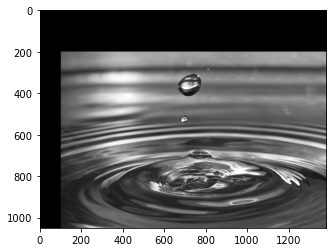

In [5]:
dst = cv2.warpAffine(img, M, (width+tx, height+ty))
plt.imshow(dst, cmap='gray')
plt.show()

Ahora rotemos la imagen

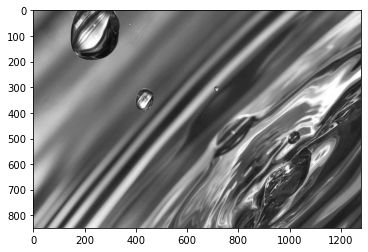

In [9]:
theta = 45

center = (width//2, height//2)
scale = 2

M = cv2.getRotationMatrix2D(center, theta, scale)

dst = cv2.warpAffine(img, M, (width, height))
plt.imshow(dst, cmap='gray')
plt.show()

el problema es que, de esta forma, perdemos parte de la imagen. Necesitamos dar un nuevo tamaño a la imagen para tener la rotación completa sin recortes.

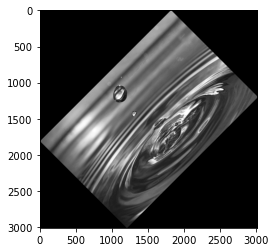

In [11]:
M = cv2.getRotationMatrix2D(center, theta, scale)

abs_cos = abs(M[0,0])
abs_sin = abs(M[0,1])

new_width = int(height * abs_sin + width * abs_cos)
new_height = int(height * abs_cos + width * abs_sin)



M[0, 2] += new_width//2 - center[0]
M[1, 2] += new_height//2 - center[1]

rotated_dst = cv2.warpAffine(img, M, (new_width, new_height))

plt.imshow(rotated_dst, cmap='gray')
plt.show()



Ahora dupliquemos el tamaño usando la función `cv2.resize`

In [1]:
print('anchura de la imagen: {}, altura de la imagen: {}'\
    .format(width, height))

dst = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)

height, width = dst.shape

print('anchura de la nueva imagen: {}, altura de la imagen: {}'\
    .format(width, height))


NameError: name 'width' is not defined